In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('processed_response.zip')


In [3]:
df

,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score,time_stamp,tokenized_responses,stemmed_responses,clean_responses,string
0,12522.0,41.0,The strengths of Plato's approach is his const...,#objectivemorality,2.0,1,"['The', 'strengths', 'of', ""Plato's"", 'approac...","['the', 'strength', 'of', 'plato', 'approach',...","['strength', 'plato', 'approach', 'construct',...",strength plato approach construct whole framew...
1,12522.0,335.0,In the breakout we discussed if outside the ca...,#objectivemorality,3.0,1,"['In', 'the', 'breakout', 'we', 'discussed', '...","['in', 'the', 'breakout', 'we', 'discuss', 'if...","['breakout', 'discuss', 'outsid', 'cave', 'mig...",breakout discuss outsid cave might bigger cave...
2,12522.0,333.0,"I think he's good at reasoning, but he has thi...",#deductivearg,2.0,1,"['I', 'think', ""he's"", 'good', 'at', 'reasonin...","['i', 'think', 'he', 'good', 'at', 'reason', '...","['think', 'good', 'reason', 'circular', 'way',...",think good reason circular way prove point onl...
3,12522.0,318.0,Back to cmmon confusion time: the section 'und...,#objectivemorality,2.0,1,"['Back', 'to', 'cmmon', 'confusion', 'time', '...","['back', 'to', 'cmmon', 'confus', 'time', 'the...","['back', 'cmmon', 'confus', 'time', 'section',...",back cmmon confus time section understand inte...
4,12522.0,315.0,Most difficult weakness is that his position w...,#objectivemorality,2.0,1,"['Most', 'difficult', 'weakness', 'is', 'that'...","['most', 'difficult', 'weak', 'is', 'that', 'h...","['difficult', 'weak', 'posit', 'understand', '...",difficult weak posit understand testabl like i...
...,...,...,...,...,...,...,...,...,...,...
191011,322265.0,1120.0,Definiteness,#algorithmicstrategies,1.0,15539,['Definiteness'],['definit'],['definit'],definit
191012,322265.0,1121.0,I think important propoerties of algorithms in...,#algorithmicstrategies,3.0,15539,"['I', 'think', 'important', 'propoerties', 'of...","['i', 'think', 'import', 'propoerti', 'of', 'a...","['think', 'import', 'propoerti', 'algorithm', ...",think import propoerti algorithm inclid defin ...
191013,322265.0,1126.0,"This is maybe not an additional property, but ...",#algorithmicstrategies,3.0,15539,"['This', 'is', 'maybe', 'not', 'an', 'addition...","['this', 'is', 'mayb', 'not', 'an', 'addit', '...","['mayb', 'addit', 'properti', 'characterist', ...",mayb addit properti characterist good algorith...
191014,322265.0,719.0,comprehensibility. This is related to efficie...,#algorithmicstrategies,3.0,15539,"['comprehensibility', 'This', 'is', 'related',...","['comprehens', 'this', 'is', 'relat', 'to', 'e...","['comprehens', 'relat', 'effici', 'demand', 'd...",comprehens relat effici demand degre concis cl...


In [4]:
df['string'] = df['string'].values.astype('U')

## Transform dataframe into tfidf 

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer()
tfidf_matrix = tfidf_vector.fit_transform(df['string'])
tfidf_matrix

<191016x81542 sparse matrix of type '<class 'numpy.float64'>'
	with 6311506 stored elements in Compressed Sparse Row format>

## Cluster by K means

### 5 clusters

In [6]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

df['cluster'] = np.array(clusters)
terms = tfidf_vector.get_feature_names_out()

CPU times: user 3min 56s, sys: 8.07 s, total: 4min 4s
Wall time: 35.6 s


# Choose the optimal K

In [30]:
from tqdm import tqdm 

sse = []
first_list_k =  list(range(2, 10))
for k in tqdm(first_list_k):
    km = KMeans(n_clusters=k)
    km.fit(tfidf_matrix)
    sse.append(km.inertia_)

100%|██████████| 8/8 [06:07<00:00, 45.89s/it]


In [32]:
second_list_k =  list(range(10, 16))
for k in tqdm(second_list_k):
    km = KMeans(n_clusters=k)
    km.fit(tfidf_matrix)
    sse.append(km.inertia_)

100%|██████████| 6/6 [07:48<00:00, 78.13s/it]


Text(0.5, 1.0, 'Elbow Method for number of clusters')

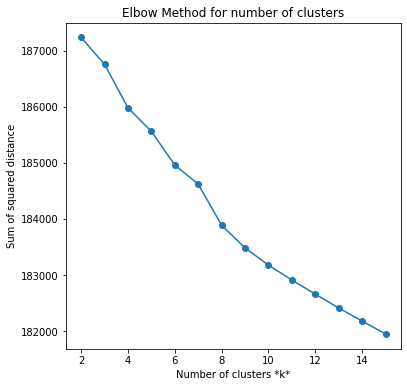

In [34]:
list_k = list(range(2, 16))
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method for number of clusters')

In [10]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :15]: #replace 6 with n words per cluster
        print(' %s' % terms[ind],end=',')
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: problem, solut, solv, constraint, water, use, rightproblem, subproblem, differ, identifi, state, goal, breakitdown, one, step,
Cluster 1 words: use, peopl, think, one, becaus, would, argument, make, differ, exampl, way, like, also, understand, could,
Cluster 2 words: poll, complet, student, present, 𝜇_i, faciilit, facia, facial, facialex, facialexpress, facien, facil, facevook, facilat, facili,
Cluster 3 words: system, compani, market, level, product, would, differ, countri, becaus, custom, emerg, individu, agent, risk, activ,
Cluster 4 words: data, would, variabl, use, model, valu, probabl, number, time, one, becaus, function, sampl, mean, differ,




/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Assessment Score Count by Cluster')

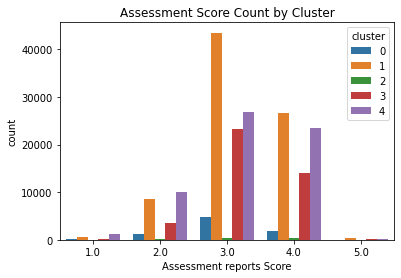

In [11]:
sns.countplot('Assessment reports Score', hue = 'cluster', data = df)
plt.title('Assessment Score Count by Cluster')

### 10 clusters

In [12]:
km_10 = KMeans(n_clusters=10)

%time km_10.fit(tfidf_matrix)

clusters10 = km_10.labels_.tolist()

df['cluster10'] = np.array(clusters10)
terms10 = tfidf_vector.get_feature_names_out()

CPU times: user 7min 33s, sys: 15.1 s, total: 7min 48s
Wall time: 1min 10s


In [13]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km_10.cluster_centers_.argsort()[:, ::-1] 

for i in range(10):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :15]: #replace 6 with n words per cluster
        print(' %s' % terms10[ind],end=',')
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: distribut, sampl, probabl, normal, mean, score, interv, calcul, would, use, valu, confid, number, trial, size,
Cluster 1 words: doc, https, com, googl, edit, document, usp, share, kgi, edu, minerva, spreadsheet, drive, colab, gid,
Cluster 2 words: compani, problem, market, product, custom, would, solut, busi, need, cost, risk, activ, use, invest, price,
Cluster 3 words: would, valu, use, time, function, becaus, number, one, algorithm, first, vector, node, find, chang, tree,
Cluster 4 words: data, variabl, hypothesi, studi, observ, test, use, treatment, would, control, differ, group, one, correl, research,
Cluster 5 words: poll, complet, student, present, 𝜇_i, faciilit, facia, facial, facialex, facialexpress, facien, facil, facevook, facilat, facili,
Cluster 6 words: argument, thesi, evid, induct, deduct, premis, conclus, use, claim, statement, support, clone, reason, make, valid,
Cluster 7 words: model, predict, use, data, paramet, variabl, woul

Text(0.5, 1.0, 'Normalized Assessment Score Count by Cluster')

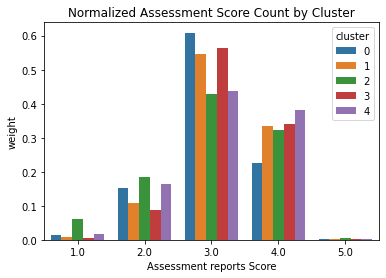

In [14]:
norm_df = df["Assessment reports Score"].groupby(df["cluster"]).value_counts().rename('count').reset_index()
norm_df = norm_df.assign(weight=norm_df['count']/norm_df.groupby('cluster')['count'].transform('sum'))

sns.barplot(x="Assessment reports Score", y="weight", hue = 'cluster', data=norm_df)
plt.title('Normalized Assessment Score Count by Cluster')

- Group 0: quite distributed grades
- Group 1: has the most 4s. CS profs gives a lots of 4s(we can test it through LO matches), or maybe writing these words sound smarter. 
- Group 3: have the most 3s. Business profs usually give 3s. They probably don't know what to grade on? 

/Users/swimmingcircle/Library/Python/3.9/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Assessment Score Count by Cluster')

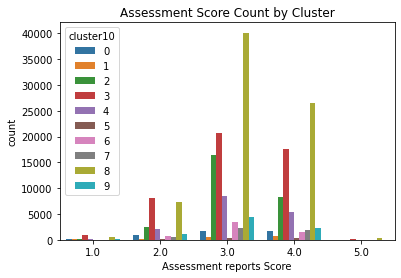

In [15]:
sns.countplot('Assessment reports Score', hue = 'cluster10', data = df)
plt.title('Assessment Score Count by Cluster')

Text(0.5, 1.0, 'Normalized Assessment Score Count by Cluster')

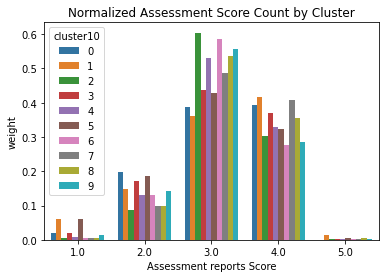

In [16]:
norm_df10 = df["Assessment reports Score"].groupby(df["cluster10"]).value_counts().rename('count').reset_index()
norm_df10 = norm_df10.assign(weight=norm_df10['count']/norm_df10.groupby('cluster10')['count'].transform('sum'))

sns.barplot(x="Assessment reports Score", y="weight", hue = 'cluster10', data=norm_df10)
plt.title('Normalized Assessment Score Count by Cluster')

In [17]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}

svd = TruncatedSVD(n_components=2)
reduced_matrix = svd.fit_transform(tfidf_matrix) 


In [18]:
r_reduced = reduced_matrix[:200]

In [19]:
reduced_matrix.shape

(191016, 2)

In [20]:
import random
sample_index = random.sample(range(1, reduced_matrix.shape[0]), 500)
sample_matrix = reduced_matrix[sample_index]

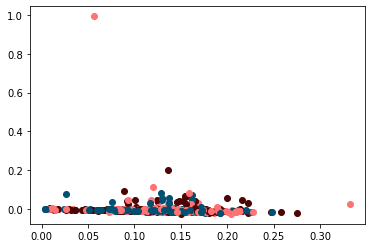

In [21]:
fig, ax = plt.subplots()
for index, instance in enumerate(sample_matrix):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = sample_matrix[index]
    color = labels_color_map[clusters[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

In [22]:

# pca_num_components = 2
# reduced_data = PCA(n_components=pca_num_components).fit_transform(tfidf_matrix)

In [23]:
# from sklearn.manifold import TSNE

# embeddings = TSNE(n_components=2)
# Y = embeddings.fit_transform(tfidf_matrix)

In [24]:
df

,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score,time_stamp,tokenized_responses,stemmed_responses,clean_responses,string,cluster,cluster10
0,12522.0,41.0,The strengths of Plato's approach is his const...,#objectivemorality,2.0,1,"['The', 'strengths', 'of', ""Plato's"", 'approac...","['the', 'strength', 'of', 'plato', 'approach',...","['strength', 'plato', 'approach', 'construct',...",strength plato approach construct whole framew...,1,8
1,12522.0,335.0,In the breakout we discussed if outside the ca...,#objectivemorality,3.0,1,"['In', 'the', 'breakout', 'we', 'discussed', '...","['in', 'the', 'breakout', 'we', 'discuss', 'if...","['breakout', 'discuss', 'outsid', 'cave', 'mig...",breakout discuss outsid cave might bigger cave...,1,8
2,12522.0,333.0,"I think he's good at reasoning, but he has thi...",#deductivearg,2.0,1,"['I', 'think', ""he's"", 'good', 'at', 'reasonin...","['i', 'think', 'he', 'good', 'at', 'reason', '...","['think', 'good', 'reason', 'circular', 'way',...",think good reason circular way prove point onl...,1,8
3,12522.0,318.0,Back to cmmon confusion time: the section 'und...,#objectivemorality,2.0,1,"['Back', 'to', 'cmmon', 'confusion', 'time', '...","['back', 'to', 'cmmon', 'confus', 'time', 'the...","['back', 'cmmon', 'confus', 'time', 'section',...",back cmmon confus time section understand inte...,1,8
4,12522.0,315.0,Most difficult weakness is that his position w...,#objectivemorality,2.0,1,"['Most', 'difficult', 'weakness', 'is', 'that'...","['most', 'difficult', 'weak', 'is', 'that', 'h...","['difficult', 'weak', 'posit', 'understand', '...",difficult weak posit understand testabl like i...,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
191011,322265.0,1120.0,Definiteness,#algorithmicstrategies,1.0,15539,['Definiteness'],['definit'],['definit'],definit,1,3
191012,322265.0,1121.0,I think important propoerties of algorithms in...,#algorithmicstrategies,3.0,15539,"['I', 'think', 'important', 'propoerties', 'of...","['i', 'think', 'import', 'propoerti', 'of', 'a...","['think', 'import', 'propoerti', 'algorithm', ...",think import propoerti algorithm inclid defin ...,4,3
191013,322265.0,1126.0,"This is maybe not an additional property, but ...",#algorithmicstrategies,3.0,15539,"['This', 'is', 'maybe', 'not', 'an', 'addition...","['this', 'is', 'mayb', 'not', 'an', 'addit', '...","['mayb', 'addit', 'properti', 'characterist', ...",mayb addit properti characterist good algorith...,1,3
191014,322265.0,719.0,comprehensibility. This is related to efficie...,#algorithmicstrategies,3.0,15539,"['comprehensibility', 'This', 'is', 'related',...","['comprehens', 'this', 'is', 'relat', 'to', 'e...","['comprehens', 'relat', 'effici', 'demand', 'd...",comprehens relat effici demand degre concis cl...,4,3


In [25]:
c_0 = df[df['cluster'] == 0]['Assessment reports Score']
c_1 = df[df['cluster'] == 1]['Assessment reports Score']
c_2 = df[df['cluster'] == 2]['Assessment reports Score']
c_3 = df[df['cluster'] == 3]['Assessment reports Score']
c_4 = df[df['cluster'] == 4]['Assessment reports Score']

In [26]:
min_len = min(len(c_0), len(c_2), len(c_3), len(c_4), len(c_1))

In [27]:
c_0 = c_0.sample(n = min_len , replace=True, random_state=1, ignore_index=True)
c_1 = c_1.sample(n = min_len , replace=True, random_state=1, ignore_index=True)
c_2 = c_2.sample(n = min_len , replace=True, random_state=1, ignore_index=True)
c_3 = c_3.sample(n = min_len , replace=True, random_state=1, ignore_index=True)
c_4 = c_4.sample(n = min_len , replace=True, random_state=1, ignore_index=True)

c = pd.concat([c_0,c_1, c_2, c_3, c_4], axis = 1)
c.columns = ['c_0', 'c_1', 'c_2', 'c_3', 'c_4']

In [28]:
c

,c_0,c_1,c_2,c_3,c_4
0,3.0,3.0,2.0,4.0,4.0
1,3.0,4.0,3.0,4.0,2.0
2,2.0,3.0,3.0,3.0,4.0
3,4.0,4.0,4.0,4.0,3.0
4,4.0,3.0,2.0,4.0,2.0
...,...,...,...,...,...
929,3.0,4.0,2.0,2.0,4.0
930,2.0,3.0,3.0,3.0,2.0
931,3.0,4.0,3.0,4.0,3.0
932,4.0,4.0,3.0,3.0,3.0


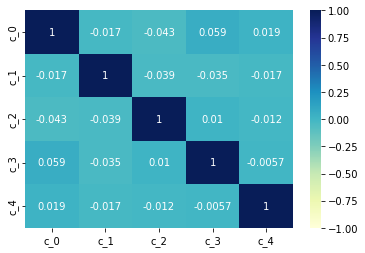

In [29]:
corrMatrix = c.corr()
sns.heatmap(corrMatrix, annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")
plt.show()